# Setup

In [ ]:
pip install 'eugene-tools'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.9/687.9 kB 47.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 36.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 112.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of seqexplainer to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of seqpro to determine which version is compatible with oth

In [ ]:
#add magic command for plots to show in notebook and import  eugene libs
%matplotlib inline
from eugene import dataload
from eugene import settings

In [ ]:
#set up dorectories and mount drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content")
cwd = os.getcwd()
cwd

Mounted at /content/drive


'/content'

In [ ]:
# Configure EUGENe directories, if you do not set these, EUGENe will use the default directories
from eugene import settings
settings.config_dir = "./tutorial_configs" # Directory to specify when you want to load a model from a config file
settings.dataset_dir = "./tutorial_dataset" # Directory where EUGENe will download datasets to
settings.logging_dir = "./tutorial_logs" # Directory where EUGENe will save Tensorboard training logs and model checkpoints to
settings.output_dir = "./tutorial_output" # Directory where EUGENe will save output files to
settings.figure_dir = "./tutorial_figures" # Directory to specify to EUGENe to save figures to

In [ ]:
import seqdatasets

In [ ]:
#check dataset
seqdatasets.get_dataset_info()

,n_seqs,n_targets,metadata,url,description,author
dataset_name,,,,,,
random1000,1000,1,10 randomly generated binary labels (label_{0-...,https://github.com/cartercompbio/EUGENe/tree/m...,A randomly generated set of 1000 sequences wit...,Adam Klie (aklie@eng.ucsd.edu)
ray13,241357,244,"probe set (Probe_Set), bidning intensity value...",http://hugheslab.ccbr.utoronto.ca/supplementar...,This dataset represents an in vitro RNA bindin...,Hayden Stites (haydencooperstites@gmail.com)
farley15,163708,2,"barcode (Barcode), RPMs from each biological r...",https://zenodo.org/record/6863861#.YuG15uxKg-Q,This dataset represents SEL-seq data of C. int...,Adam Klie (aklie@eng.ucsd.edu)
deBoer20,100000000+,1,Variable depending on chosen file,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,Gigantic parallel reporter assay data from ~10...,Adam Klie (aklie@eng.ucsd.edu)
jores21,147966,1,"set (set), species (sp), gene promoter came fr...",https://raw.githubusercontent.com/tobjores/Syn...,"This datast includes activity scores for 79,83...",Adam Klie (aklie@eng.ucsd.edu)
deAlmeida22,484052,4,Normalized enrichment scores for developmental...,https://zenodo.org/record/5502060/,This dataset includes UMI-STARR-seq data from ...,Adam Klie (aklie@eng.ucsd.edu)


In [ ]:
#load dataset
seqdata= seqdatasets.jores21(dataset = 'leaf')

Path /content/tutorial_dataset/jores21 does not exist, creating new folder.
Finished downloading CNN_test_leaf.tsv
Finished downloading CNN_train_leaf.tsv
Zarr file not found. Creating new zarr file.


72158it [00:01, 52108.58it/s]


In [ ]:
#check contents
seqdata

<xarray.Dataset>
Dimensions:     (_sequence: 72158, _length: 170)
Dimensions without coordinates: _sequence, _length
Data variables:
    enrichment  (_sequence) float64 dask.array<chunksize=(1000,), meta=np.ndarray>
    gene        (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(1000, 170), meta=np.ndarray>
    set         (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    sp          (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>

In [ ]:
#import to visualize the data
from eugene import plot as pl

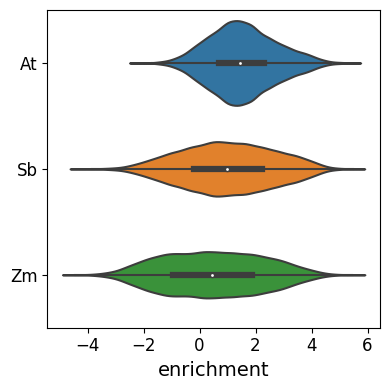

In [ ]:
pl.violinplot(seqdata, vars=["enrichment"] ,groupby= 'sp' ,orient= 'h',figsize=(4, 4))

In [ ]:
from eugene import preprocess as pp
#one hot encode the sequence data
pp.ohe_seqs_sdata(seqdata, alphabet="DNA")
#generate unique id's for each sequence
pp.make_unique_ids_sdata(seqdata)

In [ ]:
#make data split
train_data = seqdata.sel(_sequence=(seqdata['set']== 'train').compute())
test_data = seqdata.sel(_sequence=(seqdata['set']== 'test'  ).compute())

In [ ]:
#split training into testing and validation
pp.train_test_random_split(train_data, dim= '_sequence', train_var= 'train_val', test_size=0.2)

# Modeling

In [ ]:
from eugene import models

In [ ]:
#set up working directory and get model yaml files
!mkdir -p $cwd/tutorial_configs
!wget https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/hybrid.yaml -O $cwd/tutorial_configs/hybrid.yaml
!wget https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/cnn.yaml -O $cwd/tutorial_configs/cnn.yaml
!wget https://raw.githubusercontent.com/lukecamarao/models/refs/heads/main/luke_hybrid2.yaml - -O $cwd/tutorial_configs/luke_hybrid2.yaml
#!wget https://raw.githubusercontent.com/lukecamarao/eugene-models/refs/heads/main/luu_cnn.yaml -O $cwd/tutorial_configs/luu_cnn.yaml

--2024-10-02 23:33:07--  https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/hybrid.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 719 [text/plain]
Saving to: ‘/content/tutorial_configs/hybrid.yaml’

/content/tutorial_c 100%[===================>]     719  --.-KB/s    in 0s      

2024-10-02 23:33:07 (73.7 MB/s) - ‘/content/tutorial_configs/hybrid.yaml’ saved [719/719]

--2024-10-02 23:33:07--  https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/cnn.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [ ]:
#import required eugene modules/funcs
from eugene import train
from eugene import evaluate
import glob

# Model One CNN


In [ ]:
#loads a model configuration from the 'cnn.yaml' file using the 'load_config' function
model= models.load_config('cnn.yaml')

In [ ]:
#initilize the weights of the model
models.init_weights(model)

In [ ]:
#train the model
train.fit_sequence_module( model=model,
    sdata=train_data,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=128,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="cnn",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory
No seed set


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/tutorial_logs/cnn/tutorial_model/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_

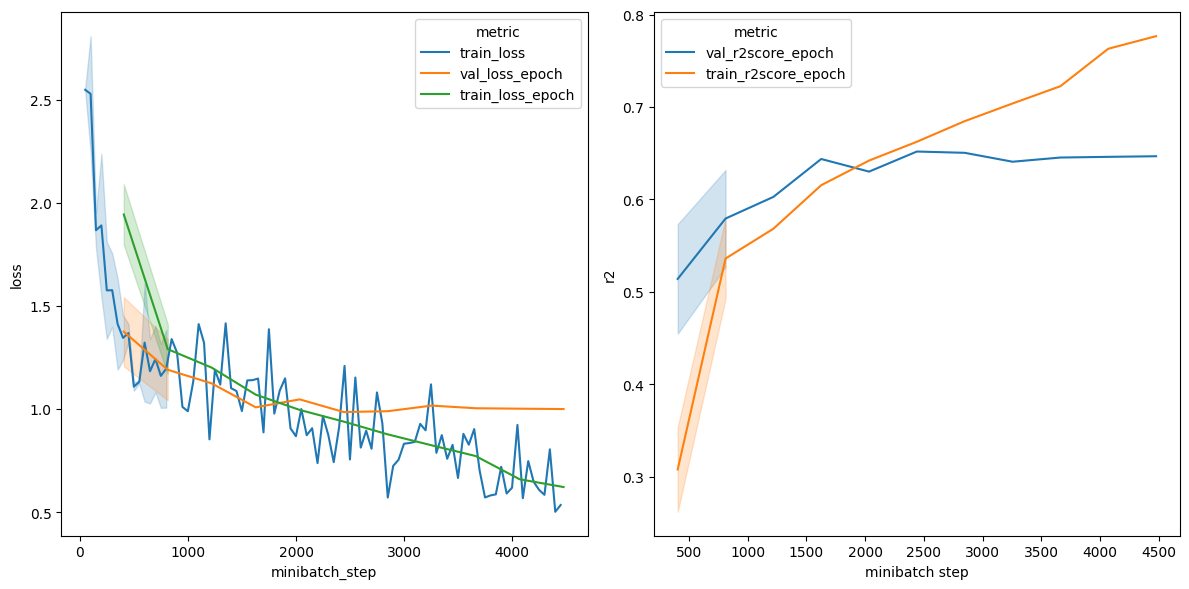

In [ ]:
#visualize training loss curve and r2 curve
pl.training_summary(os.path.join(settings.logging_dir, "cnn", "tutorial_model"), metric="r2")

In [ ]:
# searches for all files in the specified directory that match the pattern and stores them in 'model_file'
model_file = glob.glob(os.path.join(settings.logging_dir, "cnn", "tutorial_model", "checkpoints", "*"))[0]
#loads the best model from the checkpoint file
best_model = models.SequenceModule.load_from_checkpoint(model_file, arch=model.arch)

In [ ]:
# generates predictions using the best trained model on the test data
evaluate.predictions_sequence_module(
    best_model,
    sdata=test_data,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="cnn",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading ohe_seq and ['enrichment'] into memory


Predicting: |          | 0/? [00:00<?, ?it/s]

Dropping 0 sequences with NaN targets.
Group R2 MSE Pearsonr Spearmanr
At 0.3776807683783988 0.8667882001950368 0.6500654663868094
Sb 0.601355326278245 1.0823274259375963 0.7980357581203016
Zm 0.6607467607203332 1.0329740802892124 0.8219114881995876


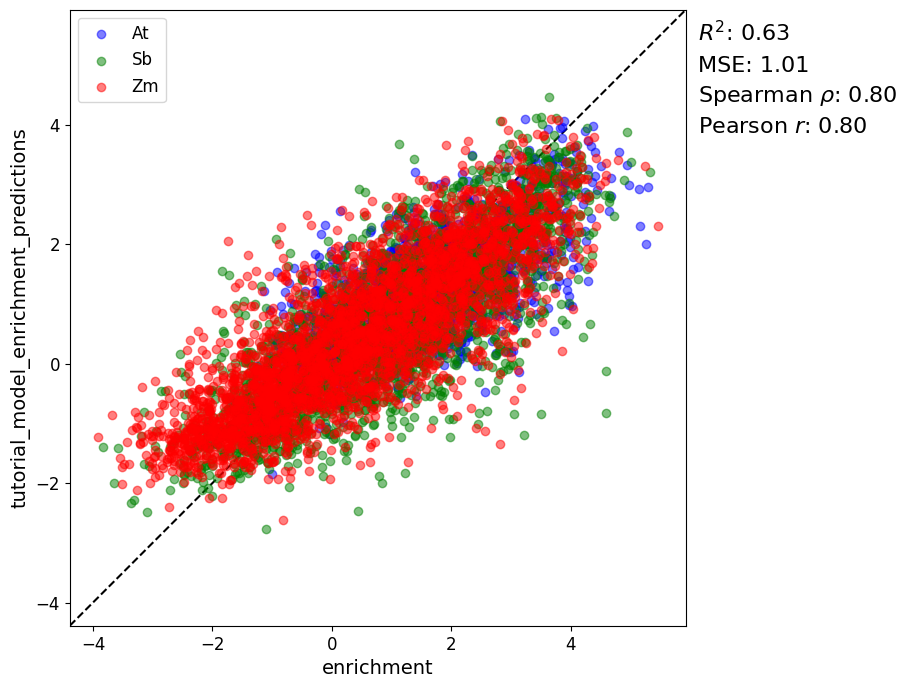

In [ ]:
# plots a scatter plot comparing actual versus predicted enrichment values from the test data
pl.performance_scatter(
    test_data,
    target_vars="enrichment",
    prediction_vars="tutorial_model_enrichment_predictions",
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8)
)


#Model Two Hybrid


In [ ]:
#loads a model configuration from the 'hybrid.yaml' file using the 'load_config' function
model= models.load_config('hybrid.yaml')

In [ ]:
#initilize the weights of the model
models.init_weights(model)

In [ ]:
#train the model
train.fit_sequence_module(
    model=model,
    sdata=train_data,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=128,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="hybrid",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True


Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory
No seed set


INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | arch         | Hybrid  | 1.9 M  | train
1 | train_metric | R2Score | 0      | train
2 | val_metric   | R2Score | 0      | train
3 | test_metric  | R2Score | 0      | train
-------------------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.703     Total estimated model params size (MB)
30        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

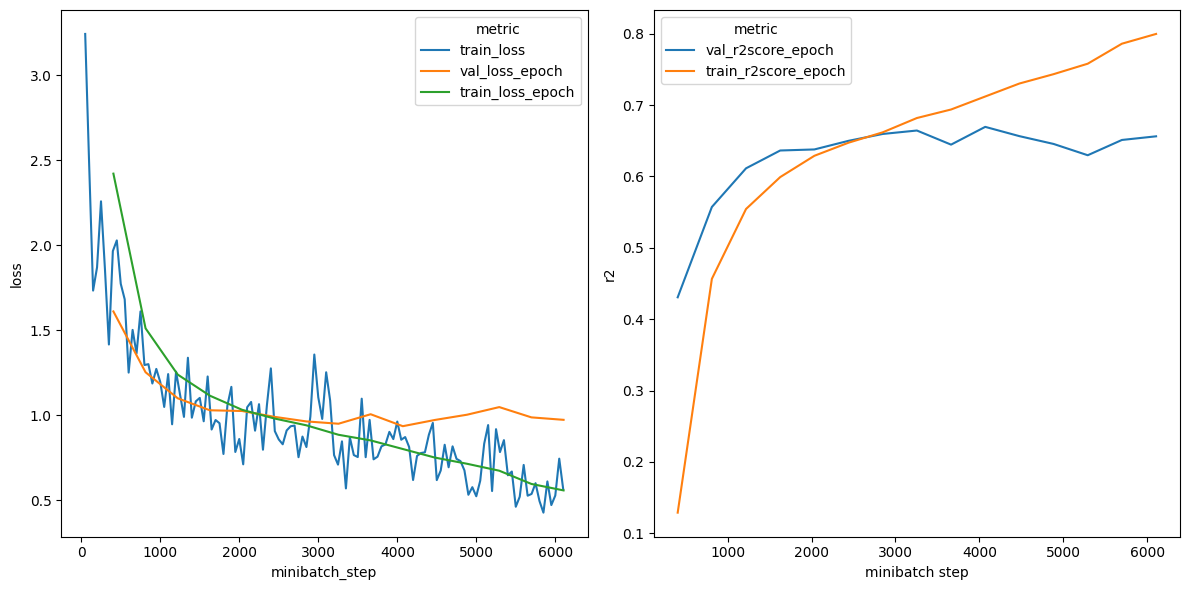

In [ ]:
#visualize training loss curve and r2 curve
pl.training_summary(os.path.join(settings.logging_dir, "hybrid", "tutorial_model"), metric="r2")

In [ ]:
# searches for all files in the specified directory that match the pattern and stores them in 'model_file'
model_file = glob.glob(os.path.join(settings.logging_dir, "hybrid", "tutorial_model", "checkpoints", "*"))[0]
#loads the best model from the checkpoint file
best_model = models.SequenceModule.load_from_checkpoint(model_file, arch=model.arch)

In [ ]:
# generates predictions using the best trained model on the test data
evaluate.predictions_sequence_module(
    best_model,
    sdata=test_data,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="hybrid",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading ohe_seq and ['enrichment'] into memory


Predicting: |          | 0/? [00:00<?, ?it/s]

Dropping 0 sequences with NaN targets.
Group R2 MSE Pearsonr Spearmanr
At 0.47836481157696054 0.7265519096259131 0.6923263928603507
Sb 0.6313472330341922 1.0008988621615709 0.8106322319530819
Zm 0.7017328585061909 0.9081776988165252 0.8388355787602659


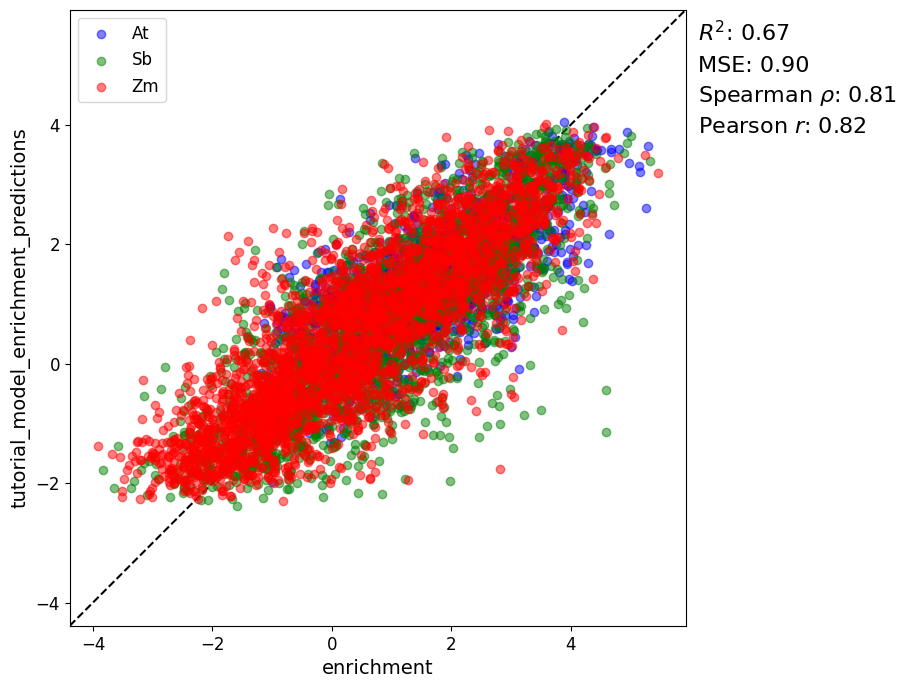

In [ ]:
# plots a scatter plot comparing actual versus predicted enrichment values from the test data
pl.performance_scatter(
    test_data,
    target_vars="enrichment",
    prediction_vars="tutorial_model_enrichment_predictions",
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8)
)

# Model Three Modified Hybrid

In [ ]:
#loads a model configuration from the 'luke_hybrid2' file using the 'load_config' function
model = models.load_config('luke_hybrid2.yaml')

In [ ]:
#initilize the weights of the model
models.init_weights(model)

In [ ]:
#train the model
train.fit_sequence_module(
    model=model,
    sdata=train_data,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=128,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="luke_hybrid",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory
No seed set


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | arch         | Hybrid  | 7.0 M  | train
1 | train_metric | R2Score | 0      | train
2 | val_metric   | R2Score | 0      | train
3 | test_metric  | R2Score | 0      | train
-------------------------------------------------
7.0 M     Trainable params
0         Non-trainable params
7.0 M     Total params
28.053    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

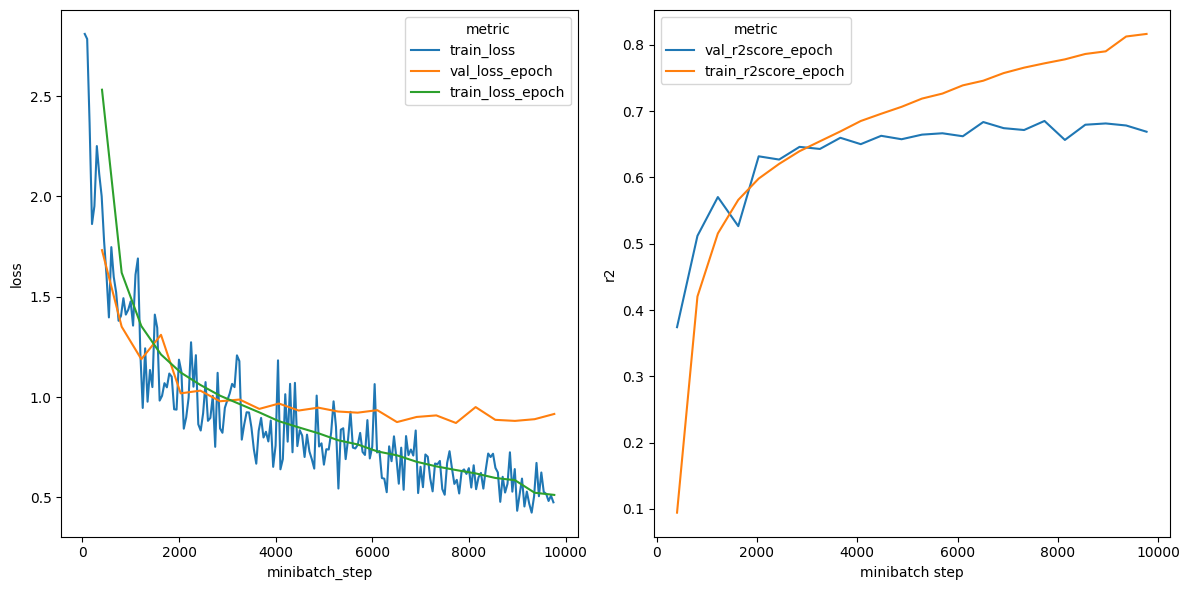

In [ ]:
#visualize training loss curve and r2 curve
pl.training_summary(os.path.join(settings.logging_dir, "luke_hybrid", "tutorial_model"), metric="r2")

In [ ]:
# searches for all files in the specified directory that match the pattern and stores them in 'model_file'
model_file = glob.glob(os.path.join(settings.logging_dir, "luke_hybrid", "tutorial_model", "checkpoints", "*"))[0]
#loads the best model from the checkpoint file
best_model = models.SequenceModule.load_from_checkpoint(model_file, arch=model.arch)

In [ ]:
# generates predictions using the best trained model on the test data
evaluate.predictions_sequence_module(
    best_model,
    sdata=test_data,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="luke_hybrid",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading ohe_seq and ['enrichment'] into memory


Predicting: |          | 0/? [00:00<?, ?it/s]

Dropping 0 sequences with NaN targets.
Group R2 MSE Pearsonr Spearmanr
At 0.5118070518522018 0.67997237650891 0.7102902406255809
Sb 0.6522264555757296 0.9442113991685662 0.8305044105025965
Zm 0.7167464928045858 0.8624634851096421 0.8481833554556342


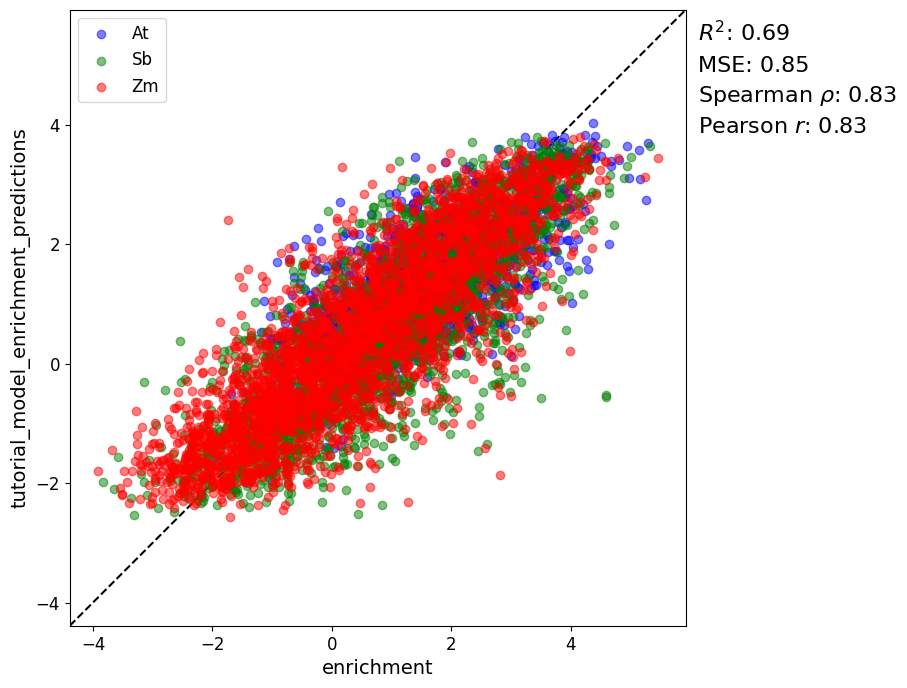

In [ ]:
# plots a scatter plot comparing actual versus predicted enrichment values from the test data
pl.performance_scatter(
    test_data,
    target_vars="enrichment",
    prediction_vars="tutorial_model_enrichment_predictions",
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8)
)